In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

### **Count Number of Images and Labels in Each Split**

In [ ]:
base_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin'  # Update this

splits = ['Train', 'Test', 'Valid']
data_info = []

for split in splits:
    image_dir = os.path.join(base_path, split, 'images')
    label_dir = os.path.join(base_path, split, 'labels')

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    data_info.append({
        'Split': split,
        'Images': len(image_files),
        'Labels': len(label_files),
        'Image_Label_Match': len(set(image_files) & set(label_files))
    })

df_counts = pd.DataFrame(data_info)
print(df_counts)


   Split  Images  Labels  Image_Label_Match
0  Train    7619    7565                  0
1   Test    1806    1805                  0
2  Valid    1708    1318                  0


In [ ]:
import os


base_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin'  # Update this
splits = ['Train', 'Test', 'Valid']

total_images = 0

for split in splits:
    image_dir = os.path.join(base_path, split, 'images')
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
    num_images = len(image_files)
    total_images += num_images
    print(f"{split.capitalize()} images: {num_images}")

print(f"\n✅ Total images in dataset: {total_images}")


Train images: 7619
Test images: 1806
Valid images: 1708

✅ Total images in dataset: 11133


In [ ]:
import os
from collections import defaultdict
import pandas as pd

base_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin'  # Update this
splits = ['Train', 'Test', 'Valid']
coin_counts = defaultdict(lambda: defaultdict(int))  # coin_counts[split][coin_type]

for split in splits:
    image_dir = os.path.join(base_path, split, 'images')
    for fname in os.listdir(image_dir):
        if fname.endswith(('.jpg', '.png')):
            coin_type = fname[:2]  # e.g., '1f', '2b'
            coin_counts[split][coin_type] += 1

# Convert to DataFrame for easier display
df = pd.DataFrame(coin_counts).fillna(0).astype(int)
df = df.rename_axis("Coin Type").reset_index()
print(df)


  Coin Type  Train  Test  Valid
0        5f   1434  1023    317
1        1f   1499   130    261
2        5b    700   100    200
3        mu    730    88      0
4        2b    700   100    200
5        1b    700   100    200
6        2f   1856   265    530


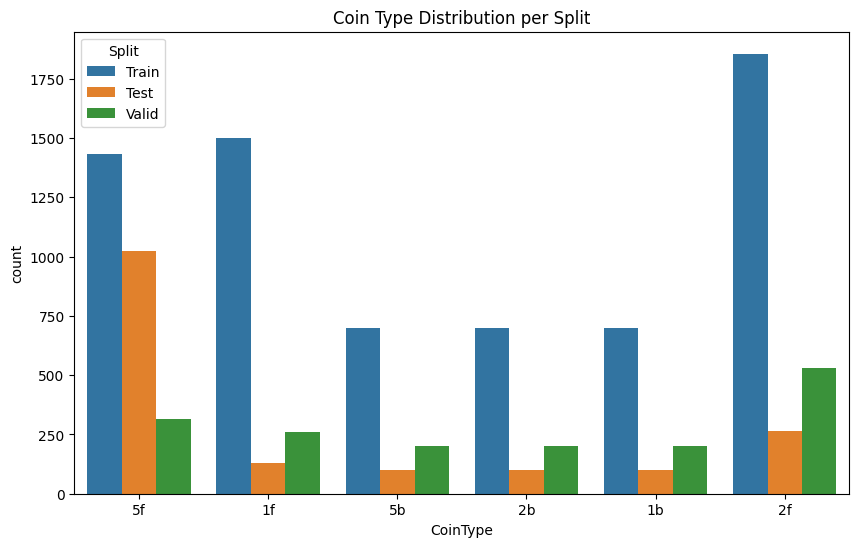

In [ ]:
def extract_coin_type(filename):
    return filename[:2]  # '1f', '2b', etc.

coin_counts = []

for split in splits:
    image_dir = os.path.join(base_path, split, 'images')
    for fname in os.listdir(image_dir):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            coin_type = extract_coin_type(fname)
            if coin_type == 'mu':
               continue
            else:
              coin_counts.append((split, coin_type))

df_coins = pd.DataFrame(coin_counts, columns=['Split', 'CoinType'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_coins, x='CoinType', hue='Split')
plt.title("Coin Type Distribution per Split")
plt.show()


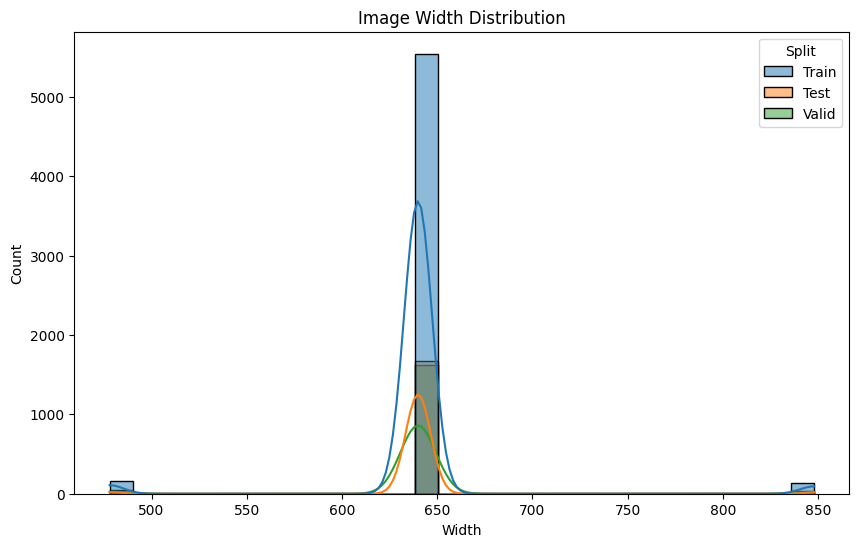

In [ ]:
resolutions = []

for split in splits:
    image_dir = os.path.join(base_path, split, 'images')
    for fname in os.listdir(image_dir):
        if fname.endswith('.jpg') or fname.endswith('.png'):
            img_path = os.path.join(image_dir, fname)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                resolutions.append((split, w, h))

df_res = pd.DataFrame(resolutions, columns=['Split', 'Width', 'Height'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df_res, x='Width', hue='Split', bins=30, kde=True)
plt.title("Image Width Distribution")
plt.show()


In [ ]:
class_counts = []

for split in splits:
    label_dir = os.path.join(base_path, split, 'labels')
    for fname in os.listdir(label_dir):
        with open(os.path.join(label_dir, fname), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.strip().split()[0]
                class_counts.append((split, class_id))

df_classes = pd.DataFrame(class_counts, columns=['Split', 'ClassID'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_classes, x='ClassID', hue='Split')
plt.title("Class Distribution per Split")
plt.show()


KeyboardInterrupt: 

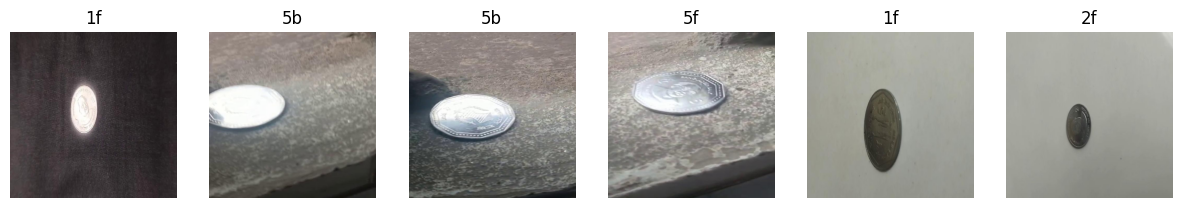

In [ ]:
import random

def show_samples(split='Train', num_samples=6):
    image_dir = os.path.join(base_path, split, 'images')
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    sample_files = random.sample(image_files, min(num_samples, len(image_files)))

    plt.figure(figsize=(15, 5))
    for i, fname in enumerate(sample_files):
        img = cv2.imread(os.path.join(image_dir, fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(fname[:2])
        plt.axis('off')
    plt.show()

show_samples('Train')


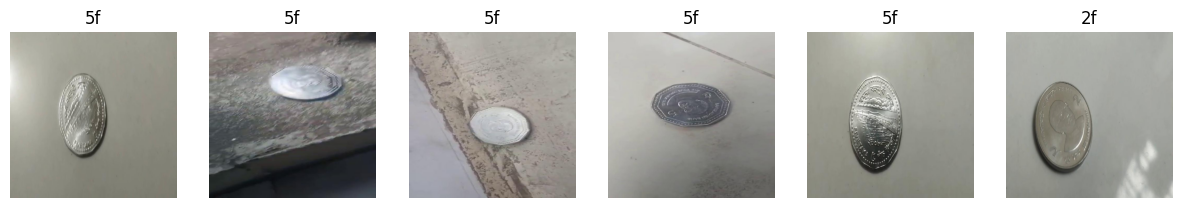

In [ ]:
import random

def show_samples(split='Test', num_samples=6):
    image_dir = os.path.join(base_path, split, 'images')
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    sample_files = random.sample(image_files, min(num_samples, len(image_files)))

    plt.figure(figsize=(15, 5))
    for i, fname in enumerate(sample_files):
        img = cv2.imread(os.path.join(image_dir, fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(fname[:2])
        plt.axis('off')
    plt.show()

show_samples('Test')


In [ ]:
import os

base_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin'  # Update this
splits = ['Train', 'Test', 'Valid']

for split in splits:
    print(f"\n--- {split.upper()} SPLIT ---")

    image_dir = os.path.join(base_path, split, 'images')
    label_dir = os.path.join(base_path, split, 'labels')

    image_files = set([os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))])
    label_files = set([os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')])

    missing_labels = image_files - label_files
    missing_images = label_files - image_files

    print(f"Total images: {len(image_files)}")
    print(f"Total labels: {len(label_files)}")
    print(f"Images without labels: {len(missing_labels)}")
    print(f"Labels without images: {len(missing_images)}")

    if missing_labels:
        print("Examples of images without labels:", list(missing_labels)[:5])

    if missing_images:
        print("Examples of labels without images:", list(missing_images)[:5])



--- TRAIN SPLIT ---
Total images: 5843
Total labels: 6033
Images without labels: 0
Labels without images: 190
Examples of labels without images: ['5f_131', '5f_0', '5f_1113', '5f_1282', '5f_118']

--- TEST SPLIT ---
Total images: 1718
Total labels: 1718
Images without labels: 1000
Labels without images: 1000
Examples of images without labels: ['5f_488', '5f_1312', '5f_181', '5f_833', '5f_999']
Examples of labels without images: ['5f_1827_jpg', '5f_1454_jpg', '5f_934_jpg', '5f_1947_jpg', '5f_1232_jpg']

--- VALID SPLIT ---
Total images: 1708
Total labels: 1318
Images without labels: 390
Labels without images: 0
Examples of images without labels: ['5f_131', '1b_536', '5f_118', '5f_127', '1b_1212']


In [ ]:
import os

base_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin'  # Update this
split = 'Train'

image_dir = os.path.join(base_path, split, 'images')
label_dir = os.path.join(base_path, split, 'labels')

# Get filenames without extensions
image_basenames = set(os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png')))
label_basenames = set(os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt'))

# Labels with no matching image
labels_without_images = label_basenames - image_basenames

print(f"Total labels without images in {split}/: {len(labels_without_images)}")
if labels_without_images:
    print("Example missing labels:")
    for name in list(labels_without_images)[:10]:
        print(f"{name}.txt")


Total labels without images in Train/: 190
Example missing labels:
5f_131.txt
5f_0.txt
5f_1113.txt
5f_1282.txt
5f_118.txt
5f_1029.txt
5f_1082.txt
5f_1277.txt
5f_1066.txt
5f_1030.txt



📂 TRAIN SPLIT ANALYSIS
Total images: 5843
Image count by coin type: {'2b': 700, '5b': 700, '1b': 700, '2f': 1856, '5f': 972, '1f': 915}


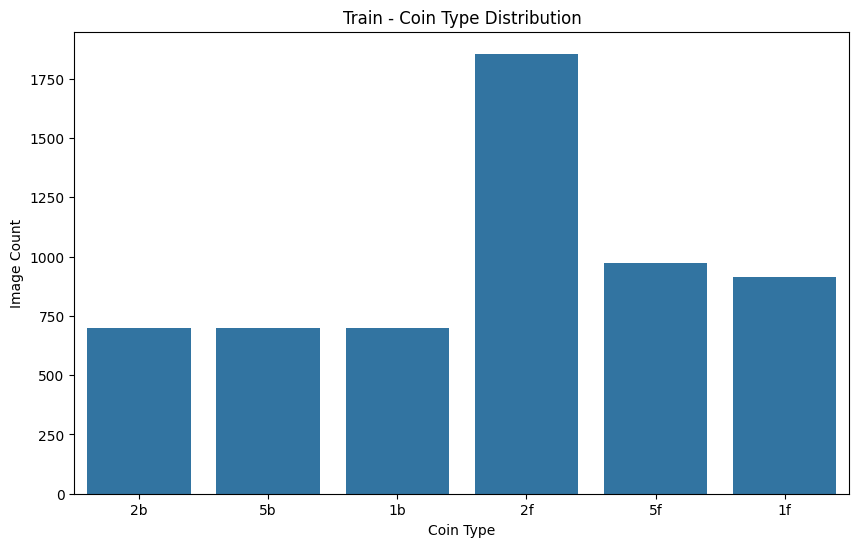

Missing labels: 0 | Missing images: 190
Resolution: min 478x478, max 848x850


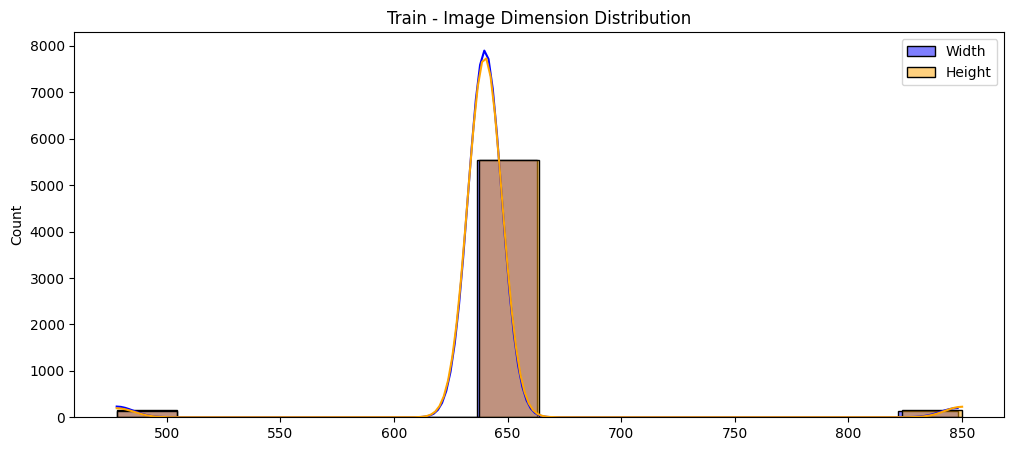

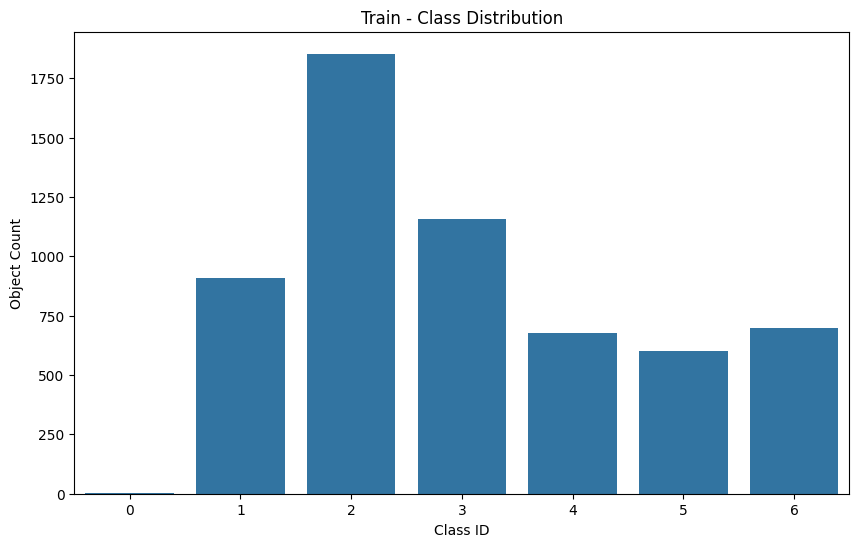


📂 TEST SPLIT ANALYSIS
Total images: 1718
Image count by coin type: {'5f': 1023, '2f': 265, '1b': 100, '2b': 100, '5b': 100, '1f': 130}


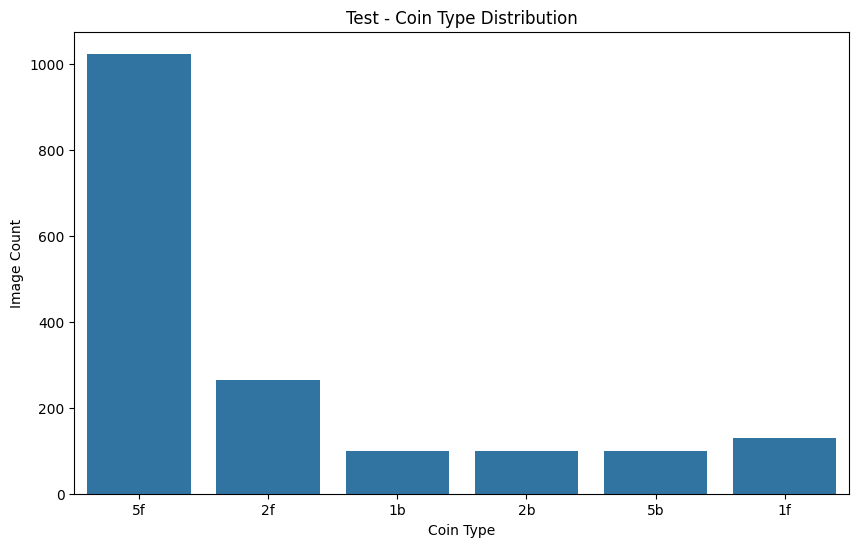

Missing labels: 1000 | Missing images: 1000
Resolution: min 478x478, max 848x850


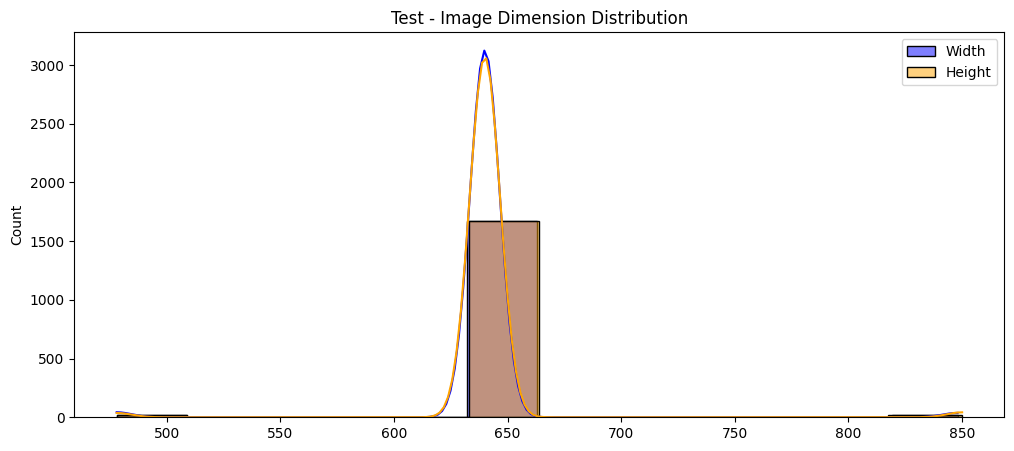

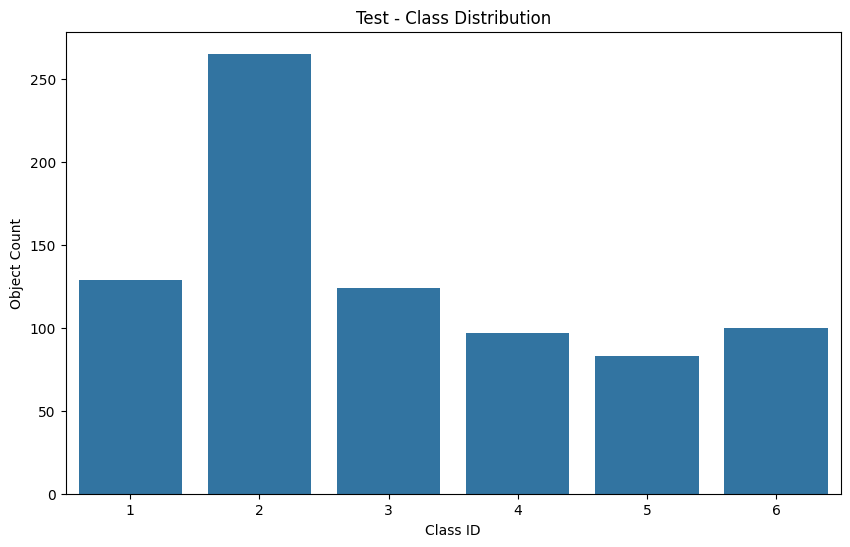


📂 VALID SPLIT ANALYSIS
Total images: 1708
Image count by coin type: {'2f': 530, '5f': 317, '1b': 200, '2b': 200, '5b': 200, '1f': 261}


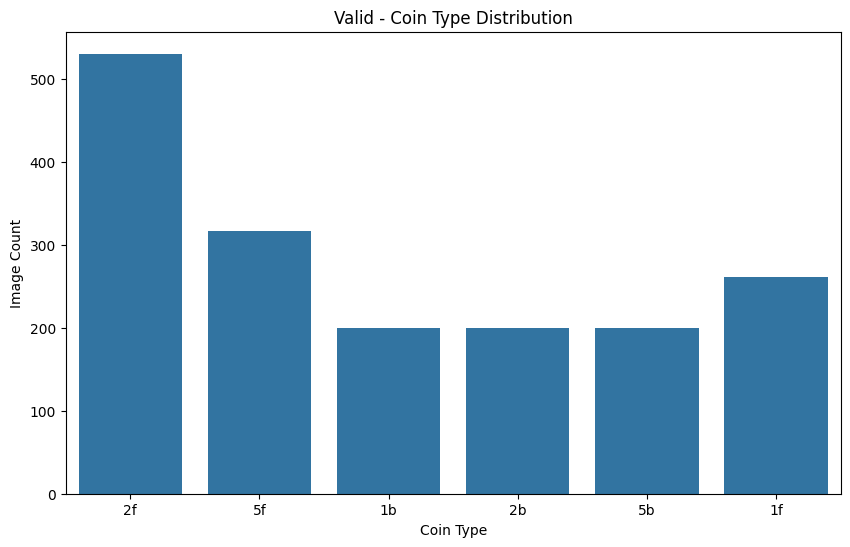

Missing labels: 390 | Missing images: 0
Resolution: min 478x478, max 848x850


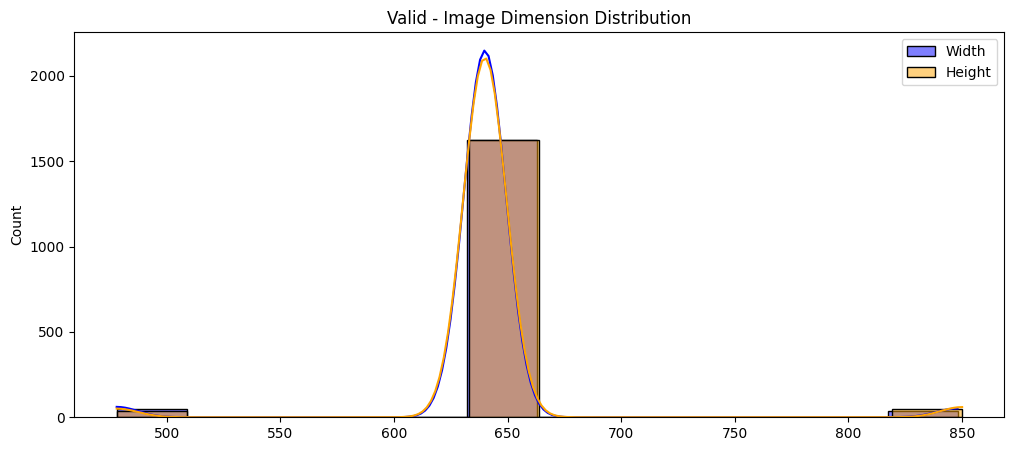

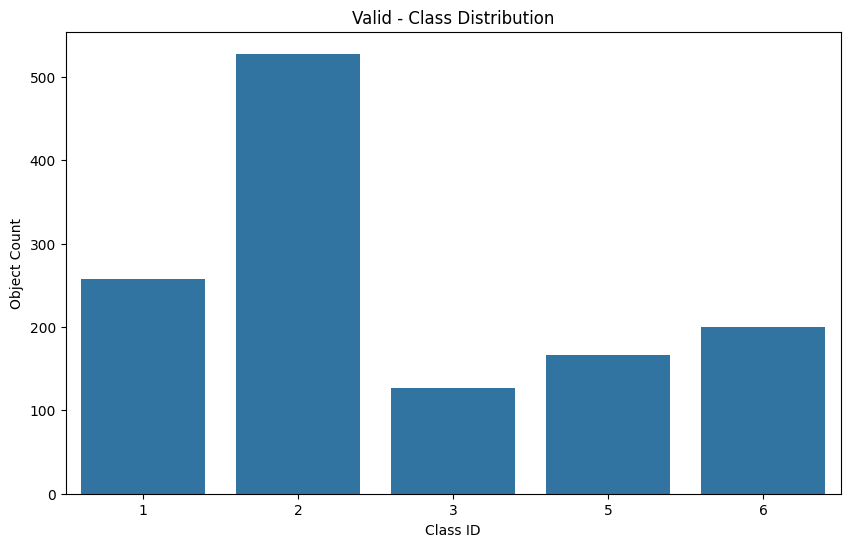


🔢 Total images across all splits: 9269


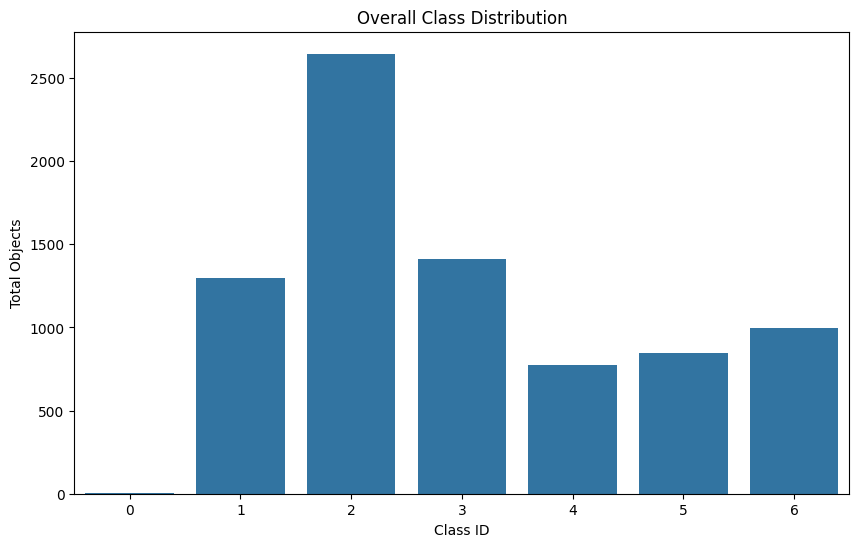

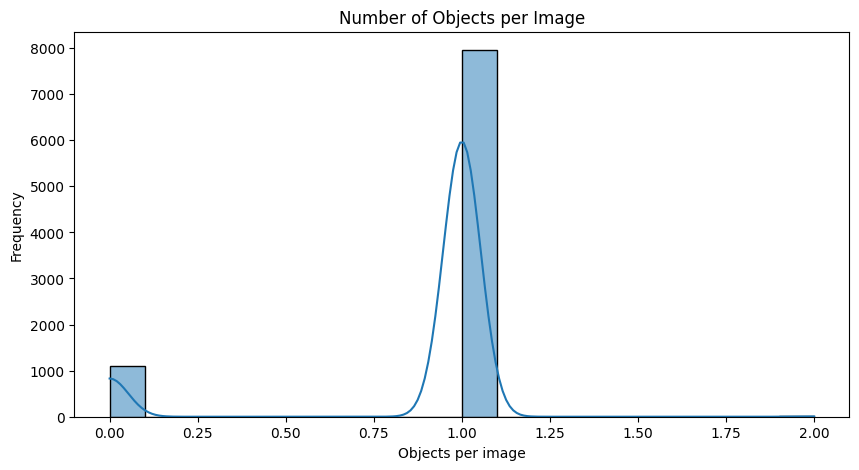

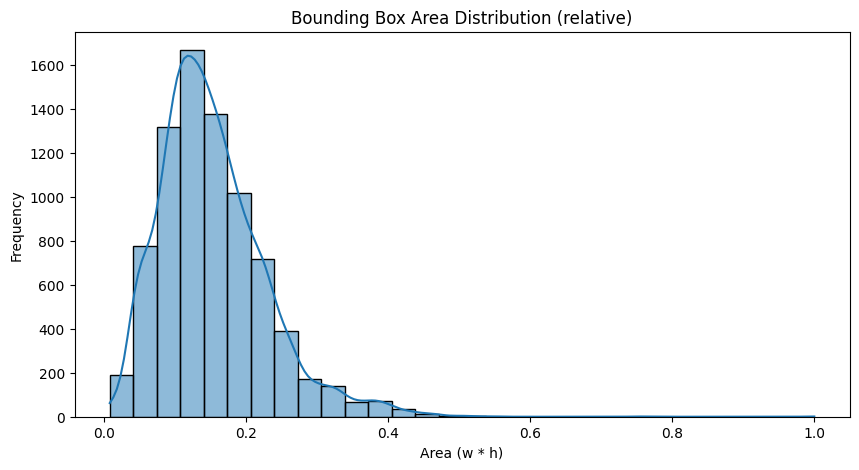


🖼 Sample images from train:


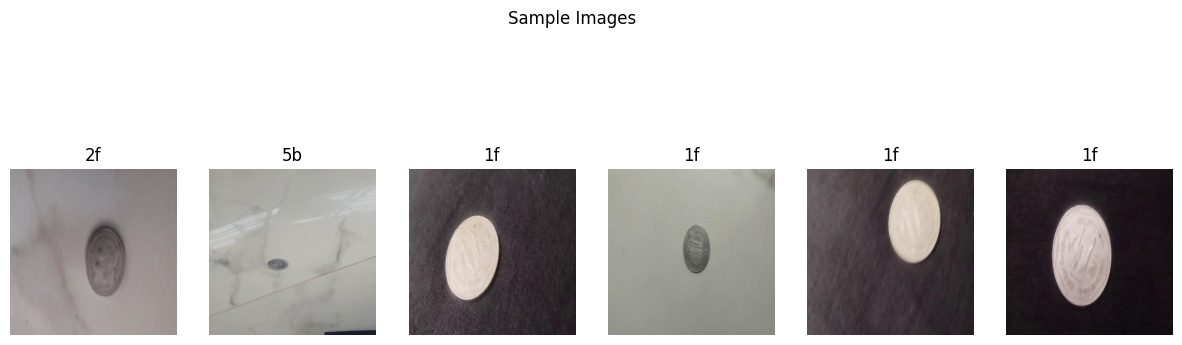

In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import numpy as np
import random

# -------------------- CONFIG --------------------
BASE_PATH ='/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin'  # Update this
  # 🔁 Set your dataset root
SPLITS = ['Train', 'Test', 'Valid']
IMAGE_EXTS = ('.jpg', '.png', '.jpeg')
# ------------------------------------------------

def get_file_basenames(directory, valid_exts):
    return set(os.path.splitext(f)[0] for f in os.listdir(directory) if f.lower().endswith(valid_exts))

def count_images_per_coin(split_path):
    counts = defaultdict(int)
    for fname in os.listdir(split_path):
        if fname.lower().endswith(IMAGE_EXTS):
            prefix = fname[:2]
            counts[prefix] += 1
    return counts

def image_stats(split, image_dir):
    widths, heights, ratios = [], [], []
    for fname in os.listdir(image_dir):
        if fname.endswith(IMAGE_EXTS):
            path = os.path.join(image_dir, fname)
            img = cv2.imread(path)
            if img is not None:
                h, w = img.shape[:2]
                widths.append(w)
                heights.append(h)
                ratios.append(round(w / h, 2))
    return widths, heights, ratios

def bbox_stats(label_dir):
    class_counts = Counter()
    bbox_areas = []
    objects_per_image = []

    for fname in os.listdir(label_dir):
        if not fname.endswith('.txt'):
            continue
        full_path = os.path.join(label_dir, fname)
        with open(full_path, 'r') as f:
            lines = f.readlines()
            objects_per_image.append(len(lines))
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, _, _, w, h = map(float, parts)
                    class_counts[int(cls)] += 1
                    bbox_areas.append(w * h)
    return class_counts, bbox_areas, objects_per_image

def check_missing_files(image_dir, label_dir):
    image_basenames = get_file_basenames(image_dir, IMAGE_EXTS)
    label_basenames = get_file_basenames(label_dir, ('.txt',))
    missing_labels = image_basenames - label_basenames
    missing_images = label_basenames - image_basenames
    return missing_labels, missing_images

def plot_bar(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(data.keys()), y=list(data.values()))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def show_image_grid(image_dir, count=6):
    files = [f for f in os.listdir(image_dir) if f.endswith(IMAGE_EXTS)]
    samples = random.sample(files, min(count, len(files)))

    plt.figure(figsize=(15,5))
    for i, fname in enumerate(samples):
        img = cv2.imread(os.path.join(image_dir, fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, count, i+1)
        plt.imshow(img)
        plt.title(fname[:2])
        plt.axis('off')
    plt.suptitle("Sample Images")
    plt.show()

# -------------------- MAIN EDA --------------------

total_images = 0
all_class_counts = Counter()
all_bbox_areas = []
all_object_counts = []

for split in SPLITS:
    print(f"\n📂 {split.upper()} SPLIT ANALYSIS")
    image_dir = os.path.join(BASE_PATH, split, 'images')
    label_dir = os.path.join(BASE_PATH, split, 'labels')

    # 1. Count images and per coin type
    img_count = len([f for f in os.listdir(image_dir) if f.endswith(IMAGE_EXTS)])
    total_images += img_count
    print(f"Total images: {img_count}")

    coin_counts = count_images_per_coin(image_dir)
    print("Image count by coin type:", dict(coin_counts))
    plot_bar(coin_counts, f"{split.capitalize()} - Coin Type Distribution", "Coin Type", "Image Count")

    # 2. Check for missing labels/images
    missing_labels, missing_images = check_missing_files(image_dir, label_dir)
    print(f"Missing labels: {len(missing_labels)} | Missing images: {len(missing_images)}")

    # 3. Image resolution stats
    widths, heights, ratios = image_stats(split, image_dir)
    print(f"Resolution: min {min(widths)}x{min(heights)}, max {max(widths)}x{max(heights)}")

    # Plot histograms
    plt.figure(figsize=(12,5))
    sns.histplot(widths, label='Width', color='blue', kde=True)
    sns.histplot(heights, label='Height', color='orange', kde=True)
    plt.legend()
    plt.title(f"{split.capitalize()} - Image Dimension Distribution")
    plt.show()

    # 4. Label / Bounding box stats
    cls_counts, bbox_areas, obj_counts = bbox_stats(label_dir)
    all_class_counts += cls_counts
    all_bbox_areas.extend(bbox_areas)
    all_object_counts.extend(obj_counts)

    if cls_counts:
        plot_bar(cls_counts, f"{split.capitalize()} - Class Distribution", "Class ID", "Object Count")

# 5. All splits summary
print("\n🔢 Total images across all splits:", total_images)
plot_bar(all_class_counts, "Overall Class Distribution", "Class ID", "Total Objects")

# 6. Object count per image
plt.figure(figsize=(10,5))
sns.histplot(all_object_counts, bins=20, kde=True)
plt.title("Number of Objects per Image")
plt.xlabel("Objects per image")
plt.ylabel("Frequency")
plt.show()

# 7. Bounding box area distribution (YOLO format)
plt.figure(figsize=(10,5))
sns.histplot(all_bbox_areas, bins=30, kde=True)
plt.title("Bounding Box Area Distribution (relative)")
plt.xlabel("Area (w * h)")
plt.ylabel("Frequency")
plt.show()

# 8. Sample images from train
print("\n🖼 Sample images from train:")
train_images = os.path.join(BASE_PATH, 'Train/images')
show_image_grid(train_images)


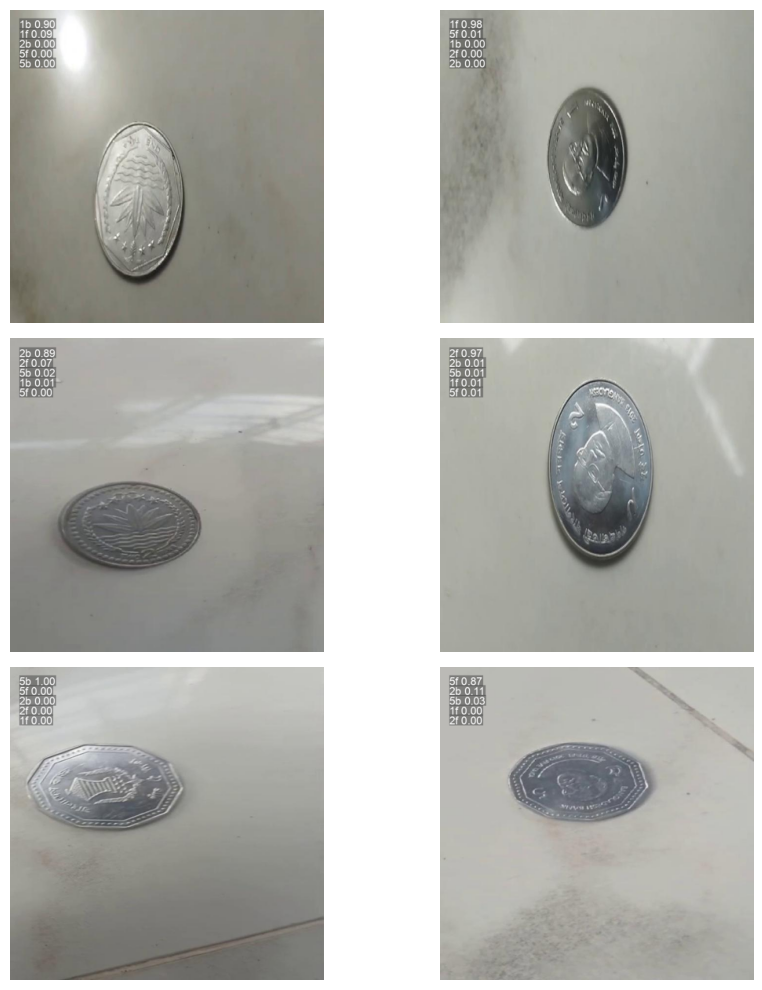

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Your 6 image file paths
paths = [
    "/content/1b class.png",
    "/content/1f class 2.png",
    "/content/2b class.png",
    "/content/2f class.png",
    "/content/5b class.png",
    "/content/5f class.png"
]

# Desired size for all images
target_size = (400, 400)  # width, height

# Load and resize images
images = [Image.open(p).resize(target_size) for p in paths]

# Display 3 images per row
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # 2 rows, 3 columns

for idx, ax in enumerate(axes.flatten()):
    ax.imshow(images[idx])
    ax.axis("off")  # Hide axis

plt.tight_layout()
plt.show()
